## Important Dependencies for the project
 Run the below code shell to install all the required dependencies for the project

In [1]:
'''
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost lightgbm shap
'''

'\n!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost lightgbm shap\n'

In [33]:
# Core libraries and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# For Handling Class Imbalance
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, SMOTENC

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For Model evaluation and explainability
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve,
                            f1_score,precision_score,fbeta_score, recall_score,
                            accuracy_score, make_scorer,precision_recall_curve)
import shap

# 1. Exploratory Data Analysis (EDA)


In [3]:
# Importing and displaying its head
train_data = "Datasets_final/train_dataset_final1.csv"
df = pd.read_csv(train_data)
pd.set_option('display.max_columns', None)
print("The 1st 5 rows of the dataset: ")
print(df.head())

# Description of continous features
exclude = ['PAY_TO_BILL_ratio','Customer_ID','marriage','sex','education','next_month_default', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
include = df.columns.difference(exclude)
print("\n \n \n Description of the various columns of dataset:")
df[include].describe()

The 1st 5 rows of the dataset: 
   Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  pay_5  pay_6  Bill_amt1  Bill_amt2  Bill_amt3  Bill_amt4  \
0      2      0      0      0   60323.86   60728.22   56472.74   28602.01   
1     -2     -2     -1      0   11157.67       0.00       0.88       0.65   
2      0      0      0      0   47930.96   48921.91   50034.26   50748.90   
3      0      0      0      0   91152.44   92916.01   90652.30   85295.56   
4     -2     -2     -2     -2   19666.40     999.04    3186.48   44932.48   

   Bill_amt5  Bill_amt6  pay_amt1  pay_amt2  pay_amt3 

,AVG_Bill_amt,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,LIMIT_BAL,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000
mean,44859.647485,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,168342.060443,35.438199,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287
std,62819.226119,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,129892.784807,9.174998,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915
min,-56043.170000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10000.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4858.670000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,50000.000000,28.000000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000
50%,21102.830000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,140000.000000,34.000000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000
75%,57136.580000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,240000.000000,41.000000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000
max,877313.830000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,1000000.000000,79.000000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000


In [4]:
# Check for NaN values
print(df.isna().sum())
print("\n \n \n \n")

# Check for any invalid values in any categorical Data
categories = ['marriage','sex','education','next_month_default','pay_0' ,'pay_6' ,'pay_2' ,'pay_3' ,'pay_4' ,'pay_5']
for cat in categories:
    print(df[cat].value_counts())
    print("\n")

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

 
 
 

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64


sex
1    15252
0     9995
Name: count, dtype: int64


education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64


next_month_default
0    204

### Inference from the above output

As we have 126 NaN values in `age` which we'll replace by median of age 

Also we have extra categories which are not defined in `education` (i.e 0,5,6) 
and in `marriage` (i.e 0) which we'll categorize in others category for both the categories (i.e replace them by 4 and 3 respectively).

In [5]:
df['age'] = df['age'].fillna(df['age'].median())
print("NaN values in age: ")
print(df['age'].isna().sum())

df['education'] = df['education'].replace({0: 4, 5: 4, 6: 4})
df['marriage'] = df['marriage'].replace({0: 3})
print(df['education'].value_counts())
print(df['marriage'].value_counts())

NaN values in age: 
0
education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64
marriage
2    13441
1    11480
3      326
Name: count, dtype: int64


In [6]:
corr = df.corr()
target_corr = corr['next_month_default'].sort_values(ascending=False)
print(target_corr)

next_month_default    1.000000
pay_0                 0.312943
pay_2                 0.252125
pay_3                 0.226015
pay_4                 0.207488
pay_5                 0.196329
pay_6                 0.180387
education             0.032346
age                   0.017703
Customer_ID          -0.001893
PAY_TO_BILL_ratio    -0.005528
Bill_amt6            -0.005725
Bill_amt5            -0.008983
Bill_amt4            -0.012032
AVG_Bill_amt         -0.014694
Bill_amt2            -0.016079
Bill_amt3            -0.016706
Bill_amt1            -0.021729
marriage             -0.029242
sex                  -0.037537
pay_amt5             -0.046960
pay_amt6             -0.047116
pay_amt3             -0.050925
pay_amt2             -0.053623
pay_amt4             -0.053624
pay_amt1             -0.068882
LIMIT_BAL            -0.146010
Name: next_month_default, dtype: float64


### Plots
The below are some plots for gaining useful insights from the data

C:\Users\heman\AppData\Local\Temp\ipykernel_4932\1876017008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['next_month_default'], data=df, palette='Set2', width = 0.25)


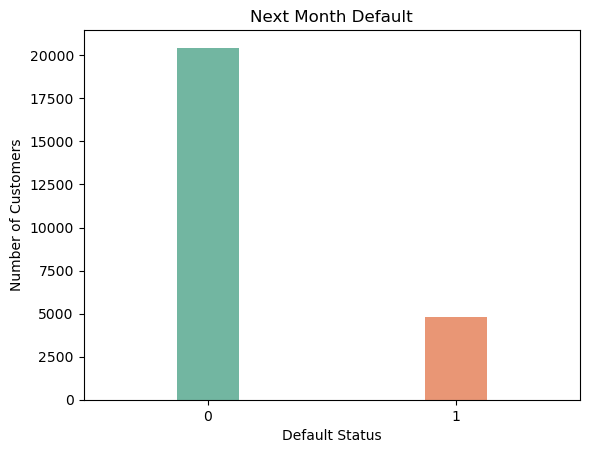

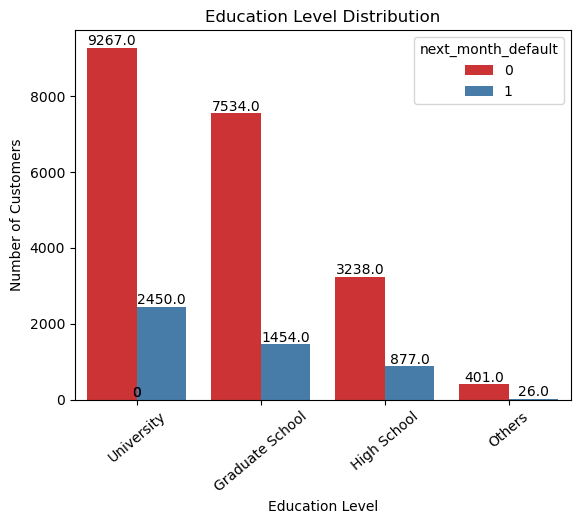

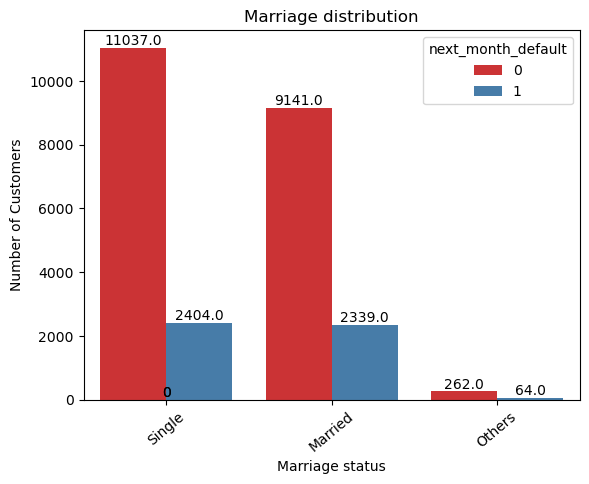

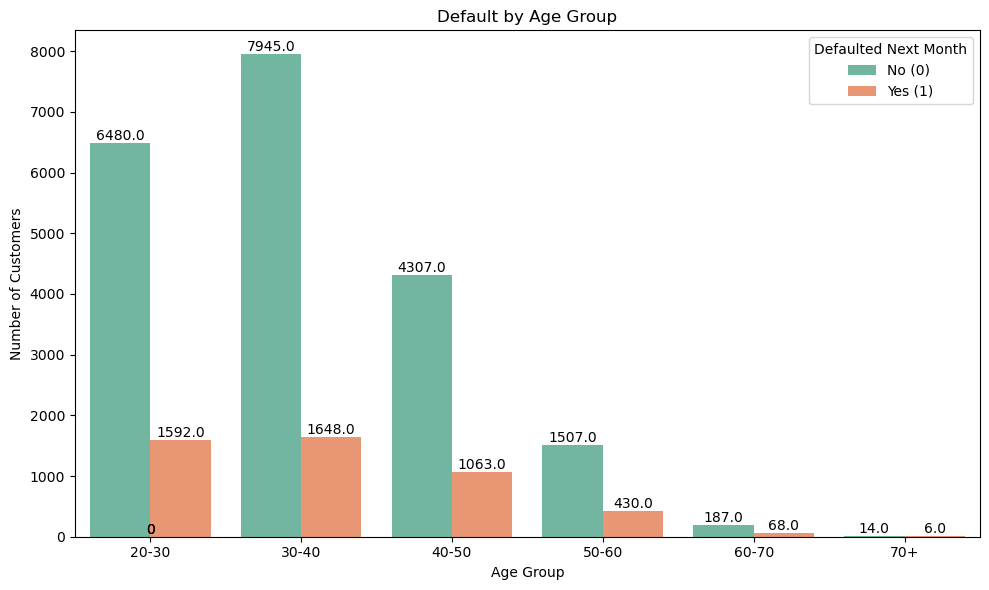

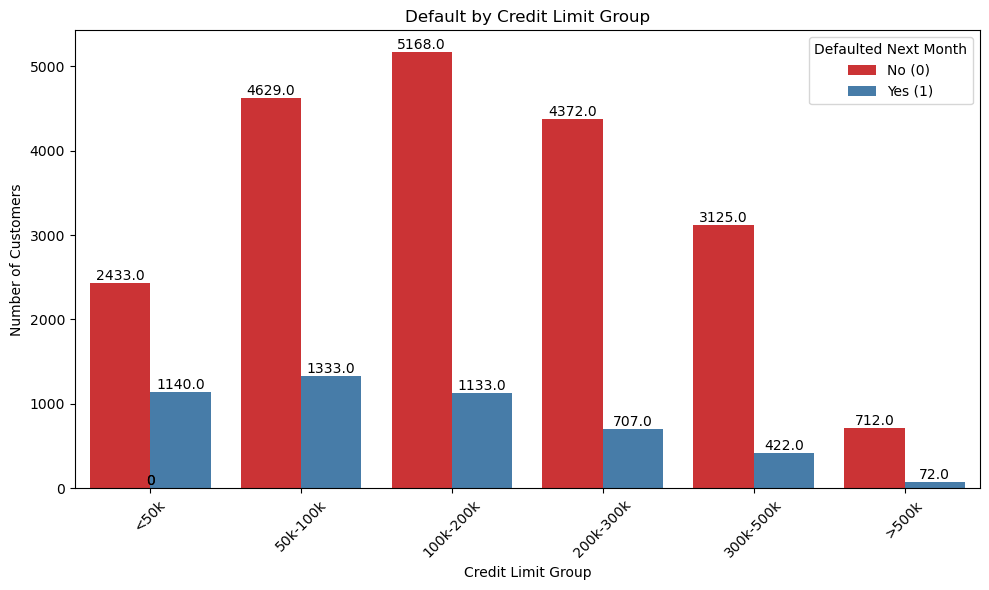

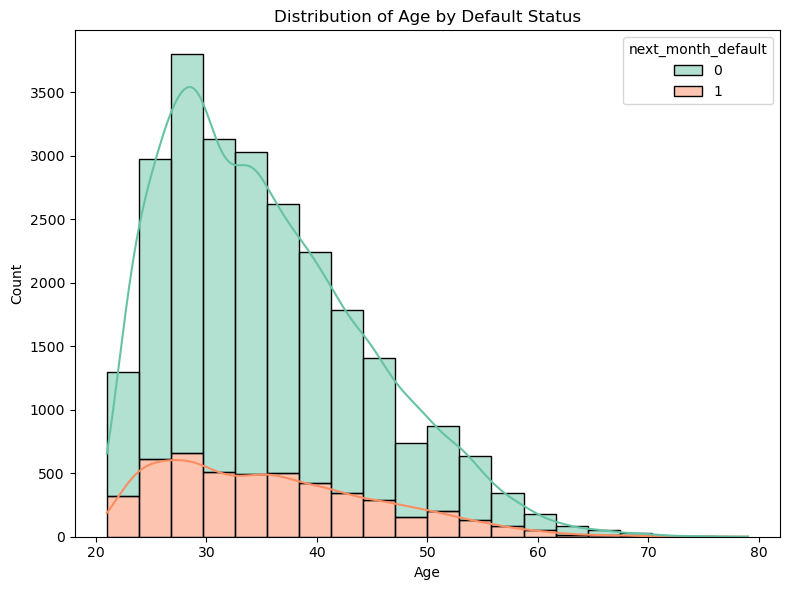

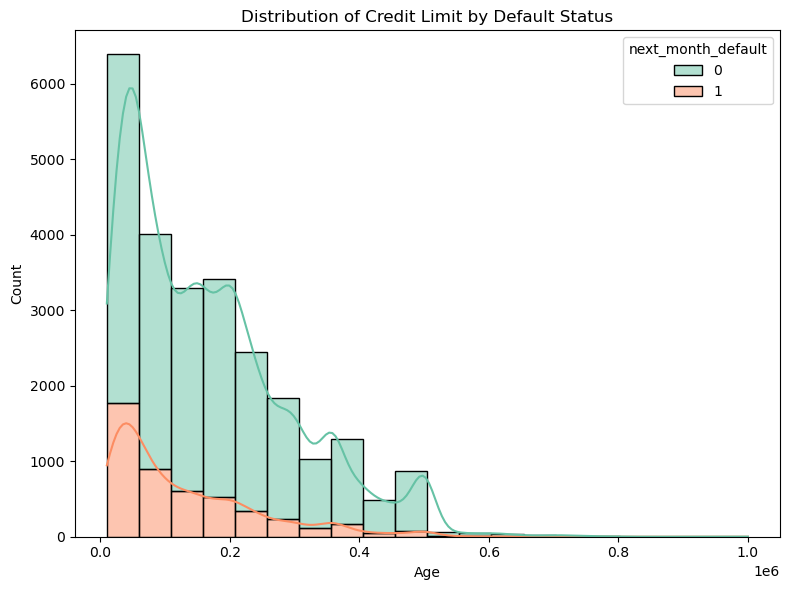

In [7]:
#Count plot for target variable
sns.countplot(x=df['next_month_default'], data=df, palette='Set2', width = 0.25)
plt.title('Next Month Default')
plt.xlabel('Default Status')
plt.ylabel('Number of Customers')
plt.show()



#Education level distribution
edu_map = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
}
df['EDUCATION_LABEL'] = df['education'].map(edu_map)

edu_plot = sns.countplot(x='EDUCATION_LABEL', hue='next_month_default', data=df, palette='Set1')
for p in edu_plot.patches:
    height = p.get_height()
    edu_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=40)
plt.show()



#Marriage Default plot
marriage_map = {
    1: 'Married',
    2: 'Single',
    3: 'Others',
}
df['Marriage_label'] = df['marriage'].map(marriage_map)

marriage_plot = sns.countplot(x='Marriage_label', hue='next_month_default', data=df, palette='Set1')
for q in marriage_plot.patches:
    height = q.get_height()
    marriage_plot.annotate(f'{height}', 
                (q.get_x() + q.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Marriage distribution')
plt.xlabel('Marriage status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=40)
plt.show()



#Default by age group
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
age_plot = sns.countplot(x='age_group', hue='next_month_default', data=df, palette='Set2')
for p in age_plot.patches:
    height = p.get_height()
    age_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Default by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Defaulted Next Month', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()



#Default by credit limit
bins_1 = [0, 50000, 100000, 200000, 300000, 500000, 1000000]
labels_1 = ['<50k', '50k-100k', '100k-200k', '200k-300k', '300k-500k', '>500k']

df['limit_group'] = pd.cut(df['LIMIT_BAL'], bins=bins_1, labels=labels_1, right=False)

plt.figure(figsize=(10, 6))
credit_lim_plot = sns.countplot(x='limit_group', hue='next_month_default', data=df, palette='Set1')

for p in credit_lim_plot.patches:
    height = p.get_height()
    credit_lim_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Default by Credit Limit Group')
plt.xlabel('Credit Limit Group')
plt.ylabel('Number of Customers')
plt.legend(title='Defaulted Next Month', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Default status by age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='next_month_default', bins=20, kde=True, palette='Set2', multiple='stack')
plt.title('Distribution of Age by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



#Default status by credit limit
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='LIMIT_BAL', hue='next_month_default', bins=20, kde=True, palette='Set2', multiple='stack')
plt.title('Distribution of Credit Limit by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Average bill amount Plot

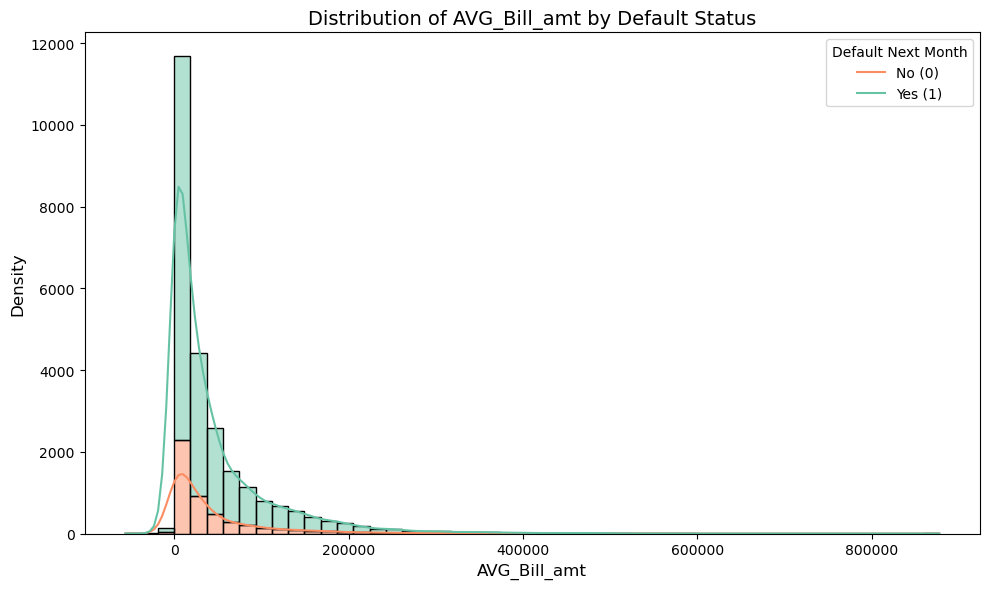

In [8]:
#Average bill amount distribution
df['next_month_default'] = df['next_month_default'].astype(str)

plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='AVG_Bill_amt',hue='next_month_default', bins=50, kde=True, palette='Set2', multiple='stack')

# Titles and labels
plt.title('Distribution of AVG_Bill_amt by Default Status', fontsize=14)
plt.xlabel('AVG_Bill_amt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Default Next Month', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

### Pay to bill ratio plot

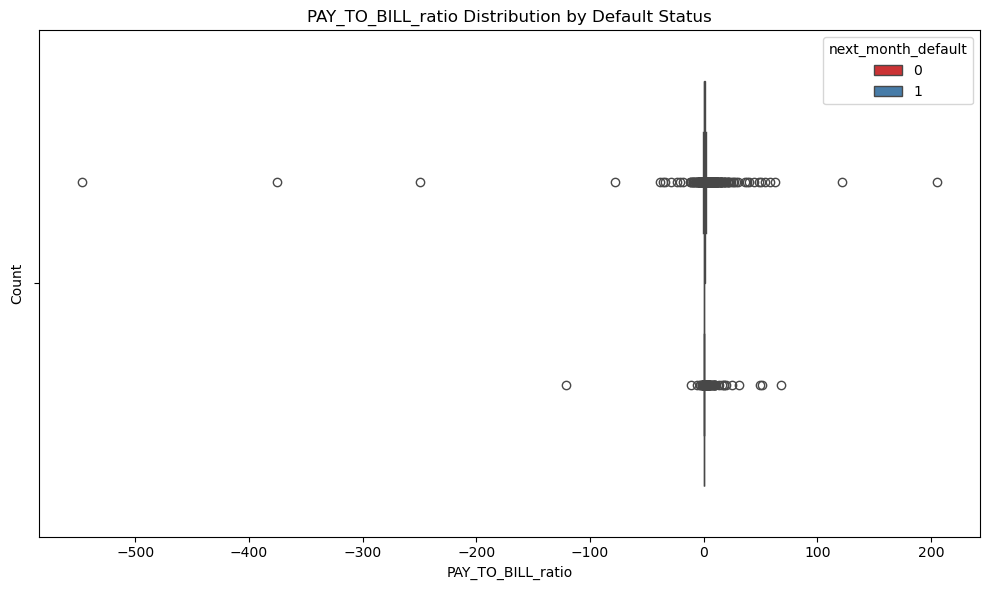

Number of outliers: 829


In [9]:
#Pay to bill ratio plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PAY_TO_BILL_ratio', hue='next_month_default', palette='Set1')

plt.title('PAY_TO_BILL_ratio Distribution by Default Status')
plt.xlabel('PAY_TO_BILL_ratio')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#For number of outliers in 'PAY_TO_BILL_ratio'
Q1 = df['PAY_TO_BILL_ratio'].quantile(0.25)
Q3 = df['PAY_TO_BILL_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['PAY_TO_BILL_ratio'] < lower_bound) | (df['PAY_TO_BILL_ratio'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

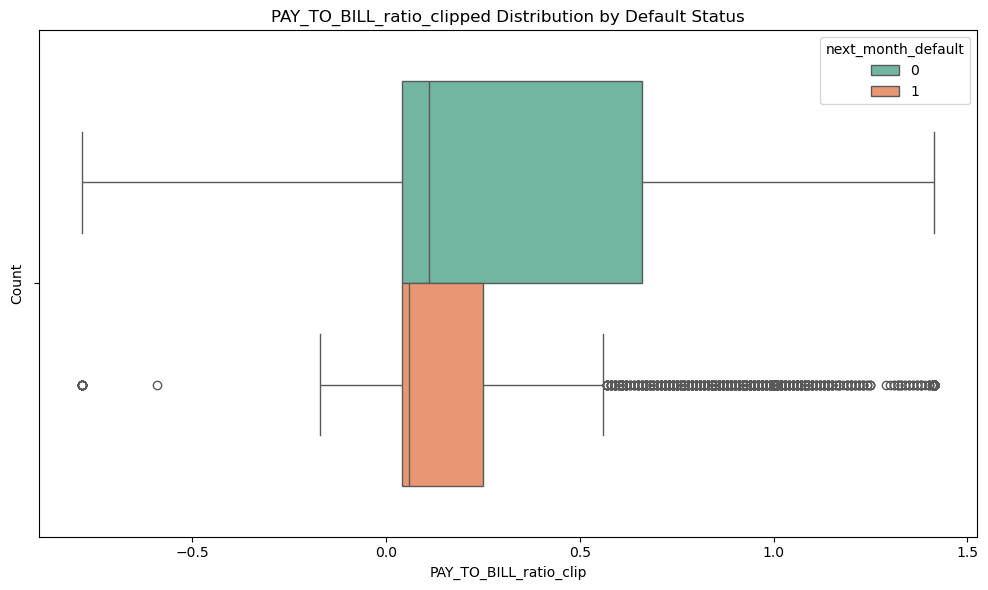

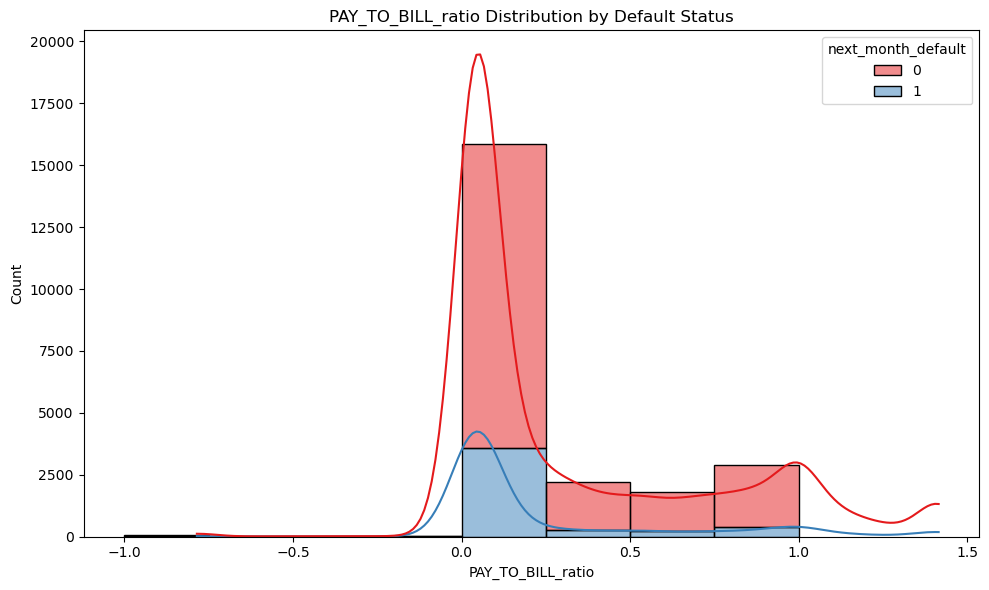

In [10]:
#Addresing outliers by clipping
df['PAY_TO_BILL_ratio_clip'] = df['PAY_TO_BILL_ratio'].clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PAY_TO_BILL_ratio_clip', hue='next_month_default', palette='Set2')

plt.title('PAY_TO_BILL_ratio_clipped Distribution by Default Status')
plt.xlabel('PAY_TO_BILL_ratio_clip')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



bins_2 = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1,]
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PAY_TO_BILL_ratio_clip', hue='next_month_default', bins=bins_2, kde=True, multiple='stack', palette='Set1')

plt.title('PAY_TO_BILL_ratio Distribution by Default Status')
plt.xlabel('PAY_TO_BILL_ratio')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Average Delay Plot

              pay_0         pay_2         pay_3         pay_4         pay_5  \
count  25247.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      -0.042857     -0.159544     -0.190359     -0.241415     -0.282568   
std        1.099315      1.173990      1.172636      1.146753      1.114213   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      7.000000      7.000000   

              pay_6  
count  25247.000000  
mean      -0.307680  
std        1.130864  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  


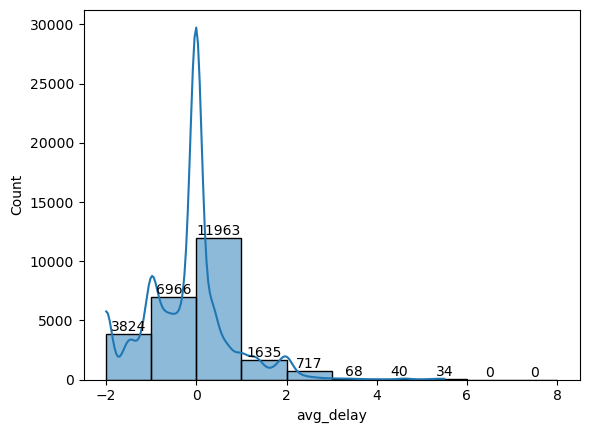

In [11]:
#Average delay plot
pay_cols = [f'pay_{i}' for i in [0] + list(range(2,7))]
print(df[pay_cols].describe())

bin_1 = [-2, -1, 0, 1, 2, 3, 4,5,6,7,8]
df['avg_delay'] = df[pay_cols].mean(axis=1)
delay_plot = sns.histplot(df['avg_delay'], bins = bin_1, kde=True)

for p in delay_plot.patches:
    height = p.get_height()
    delay_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

### Repayment Status Plot

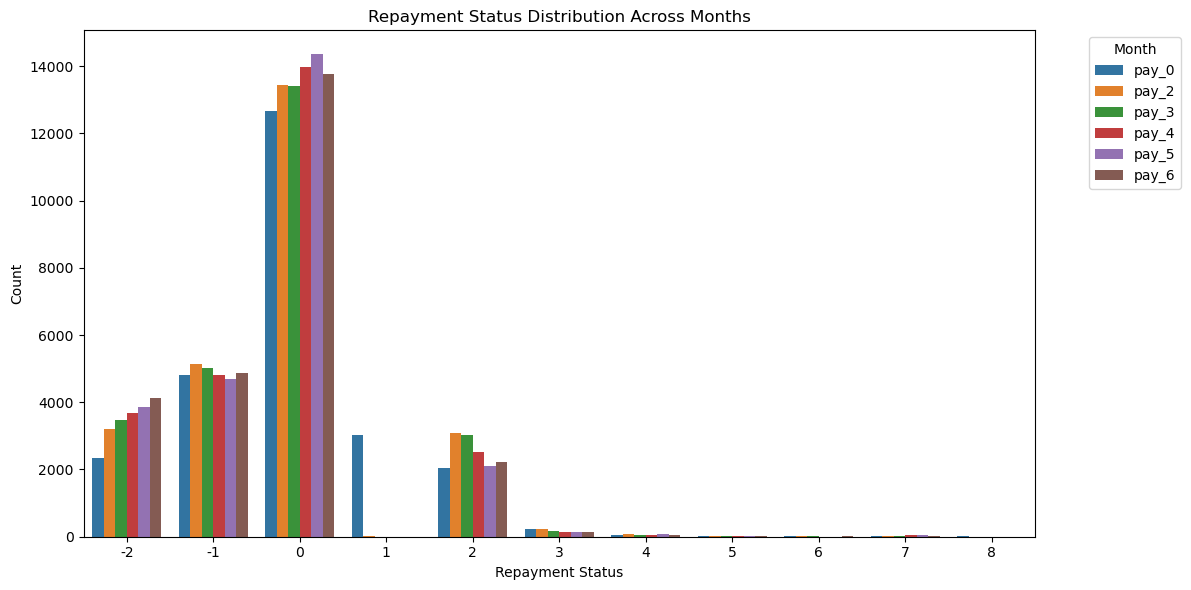

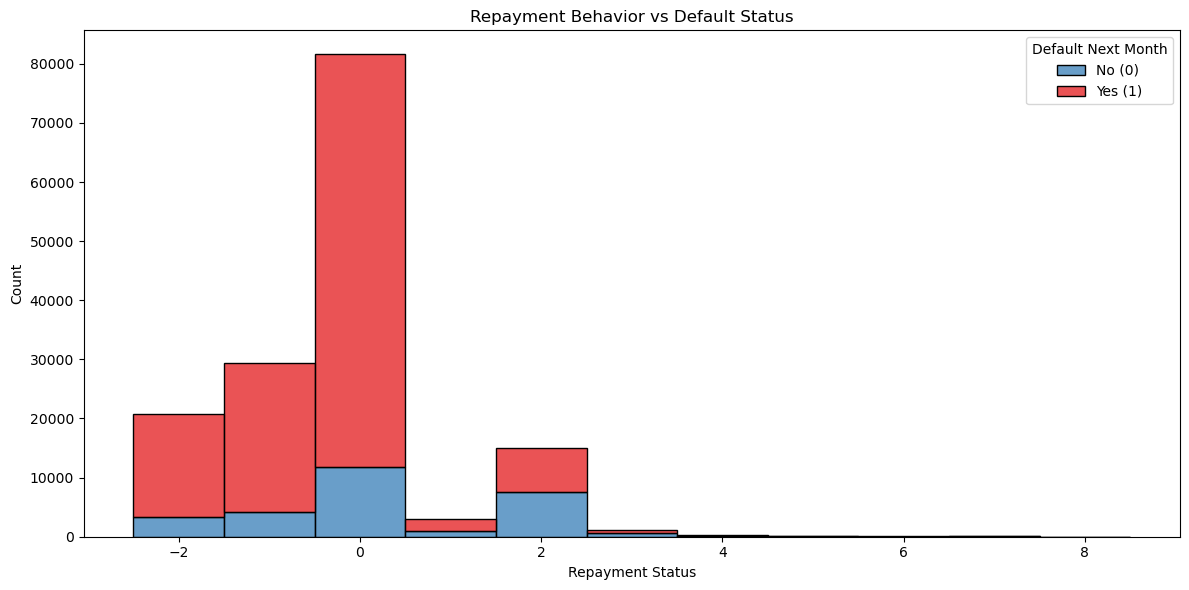

In [12]:
#Repayment status plot
df_melted = df.melt(id_vars='next_month_default', value_vars=pay_cols,
                    var_name='Month', value_name='Repayment_Status')

#Plot repayment status distribution per month
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='Repayment_Status', hue='Month', palette='tab10')
plt.title('Repayment Status Distribution Across Months')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot repayment behavior by default status
plt.figure(figsize=(12, 6))
sns.histplot(data=df_melted, x='Repayment_Status', hue='next_month_default',
             multiple='stack', bins=20, palette='Set1', discrete=True)
plt.title('Repayment Behavior vs Default Status')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.legend(title='Default Next Month', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

## Correlation Matrix / Heatmap

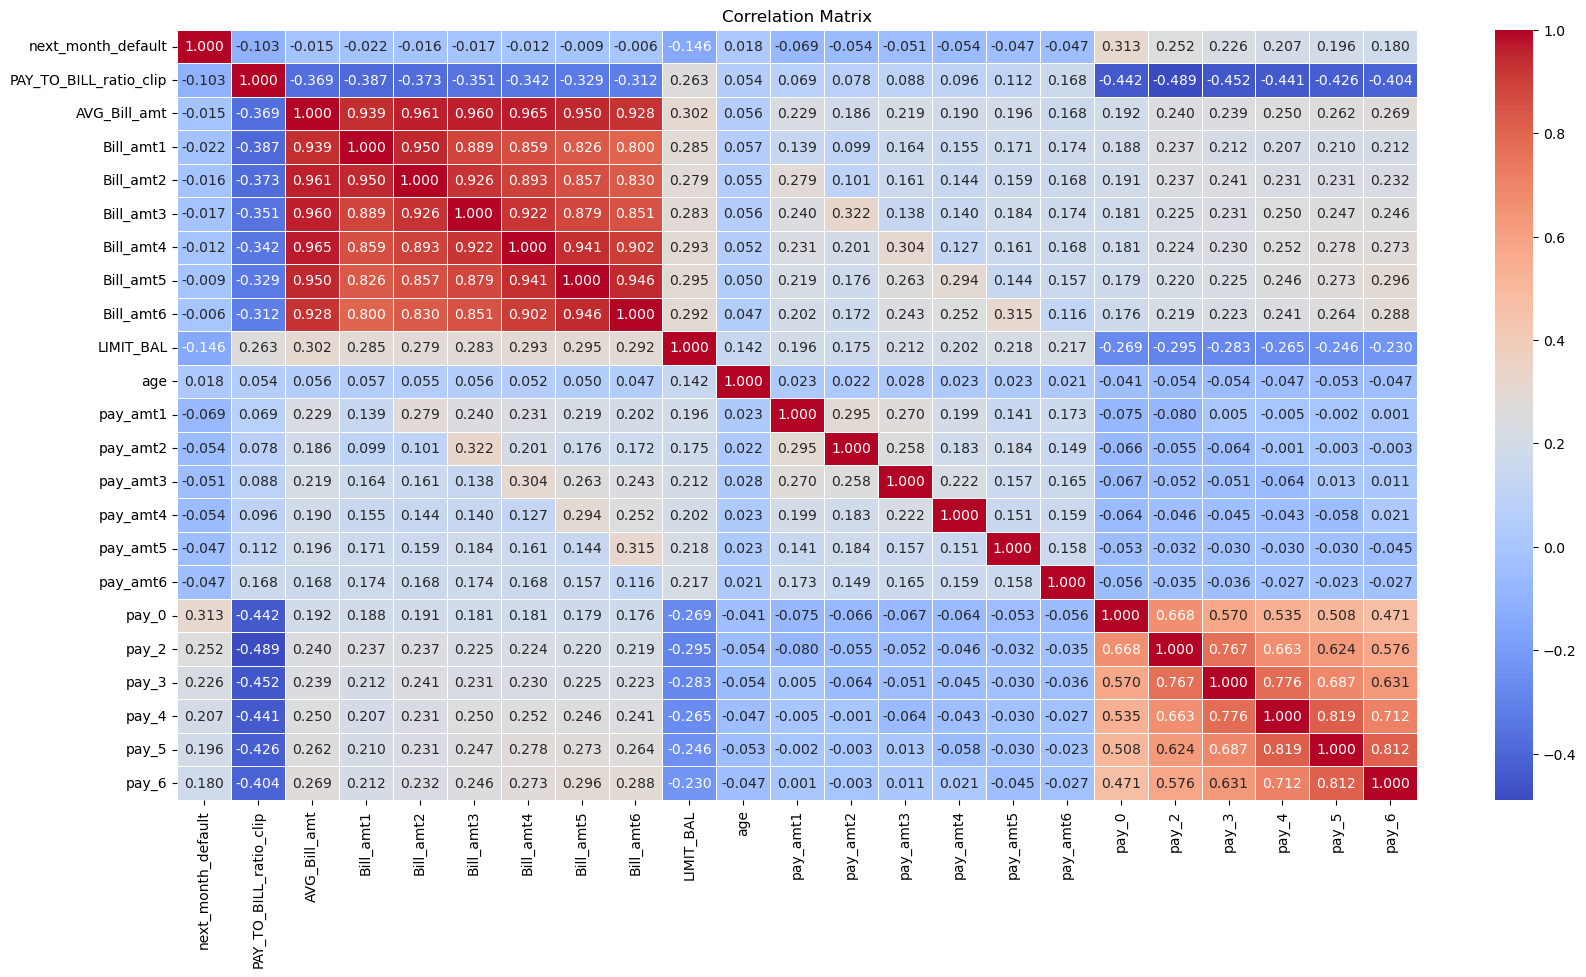

In [13]:
#Correlation matrix
include_1 = ['next_month_default', 'PAY_TO_BILL_ratio_clip'] + list(include) + list(pay_cols) 
corr_matrix = df[include_1].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [16]:
'''This code shell is for dropping all the category variables and 
    Customer_ID that we've generated above for visualization'''

drop = ['EDUCATION_LABEL', 'limit_group', 'age_group', 'Marriage_label' , 'Customer_ID', 'PAY_TO_BILL_ratio']
df.drop(drop, axis=1, inplace=True)

df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,next_month_default,PAY_TO_BILL_ratio_clip,avg_delay
0,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0,0.03,1.000000
1,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0,0.27,-0.833333
2,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0,0.04,0.000000
3,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0,0.04,0.000000
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0,0.72,-2.000000


# 2. FEATURE ENGINEERING
#### Added the following features
1. Credit Utilization Ratio (average bill amount / credit limit)
2. Average Payment Amount over 6 months
3. Payment to Limit Ratio (total payments over limit)
4. Average Delay (mean of pay_0 to pay_6 where delay >= 0)
5. Max Delay (worst delinquency)
6. Count of Delayed Months (pay_x >= 1)
7. Consistency of Repayment (std deviation of pay_amt1 to pay_amt6)
8. Total Bill Amount (sum of 6 months)
9. Ratio: Payments vs Bills (Total payments / Total bills)
10. Repayment Ratio (average payments / average bills)
11. Max Utilization Rate (max bill / limit)
12. Balance Growth Rate (bill_amt1 - bill_amt6) / bill_amt6

In [17]:
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

df['credit_utilization_ratio'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']

df['avg_pay_amt'] = df[pay_amt_cols].mean(axis=1)

df['payment_to_limit_ratio'] = df[pay_amt_cols].sum(axis=1) / df['LIMIT_BAL']

df['avg_payment_delay'] = df[pay_status_cols].apply(lambda row: row[row >= 0].mean(), axis=1).fillna(0)
 
df['max_payment_delay'] = df[pay_status_cols].max(axis=1)

df['delayed_months'] = df[pay_status_cols].apply(lambda row: (row >= 1).sum(), axis=1)

df['repayment_consistency'] = df[pay_amt_cols].std(axis=1)
 
df['total_bill_amt'] = df[bill_cols].sum(axis=1)

df['total_payment_to_bill_ratio'] = df[pay_amt_cols].sum(axis=1) / df[bill_cols].sum(axis=1).replace(0, np.nan)
 
df['repayment_ratio'] = df[pay_amt_cols].mean(axis=1) / df[bill_cols].replace(0, np.nan).mean(axis=1)

df['max_utilization'] = df[bill_cols].max(axis=1) / df['LIMIT_BAL']

df['balance_growth_rate'] = (df['Bill_amt1'] - df['Bill_amt6']) / df['Bill_amt6'].replace(0, np.nan)

#As we have used divide operator so it might have generated NaN or infinite values so to fix that 
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

new_features = ['credit_utilization_ratio', 'avg_pay_amt', 'payment_to_limit_ratio',
                'avg_payment_delay', 'max_payment_delay', 'delayed_months',
                'repayment_consistency', 'total_bill_amt',
                'total_payment_to_bill_ratio', 'repayment_ratio',
                'max_utilization', 'balance_growth_rate']

print(df[new_features].head())

   credit_utilization_ratio  avg_pay_amt  payment_to_limit_ratio  \
0                  0.691858  1326.185000                0.132619   
1                  0.008740   674.998333                0.013965   
2                  0.280122  2009.286667                0.066976   
3                  0.410617  3074.916667                0.087855   
4                  0.042194  8552.366667                0.183265   

   avg_payment_delay  max_payment_delay  delayed_months  \
0                1.0                  2               3   
1                0.0                  0               0   
2                0.0                  0               0   
3                0.0                  0               0   
4                0.0                 -2               0   

   repayment_consistency  total_bill_amt  total_payment_to_bill_ratio  \
0             714.956931       249068.99                     0.031947   
1            1129.473118        15210.46                     0.266263   
2             123

In [18]:
df[new_features].describe()

,credit_utilization_ratio,avg_pay_amt,payment_to_limit_ratio,avg_payment_delay,max_payment_delay,delayed_months,repayment_consistency,total_bill_amt,total_payment_to_bill_ratio,repayment_ratio,max_utilization,balance_growth_rate
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,2.524700e+04
mean,0.370435,5349.685697,0.235143,0.351996,0.401671,0.785915,5900.030185,2.693817e+05,57.126108,18.205099,0.492665,6.151485e+03
std,0.349451,10414.492020,0.321131,0.664764,1.321125,1.507302,15384.027068,3.768456e+05,5504.956211,1102.070157,0.432011,1.097118e+05
min,-0.200154,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000e+00
25%,0.029802,1125.200833,0.068289,0.000000,0.000000,0.000000,621.938712,2.938455e+04,0.042973,0.042544,0.070915,-1.512482e-01
50%,0.280751,2433.158333,0.156748,0.000000,0.000000,0.000000,1429.637898,1.266769e+05,0.104060,0.097190,0.426282,2.696391e-03
75%,0.682001,5641.549167,0.264483,0.500000,2.000000,1.000000,4176.290078,3.428564e+05,0.627927,0.516041,0.920626,9.258983e-01
max,3.759125,627344.321667,14.566342,6.000000,8.000000,6.000000,650098.453710,5.263884e+06,852634.315789,142105.719298,10.688579,1.069743e+07


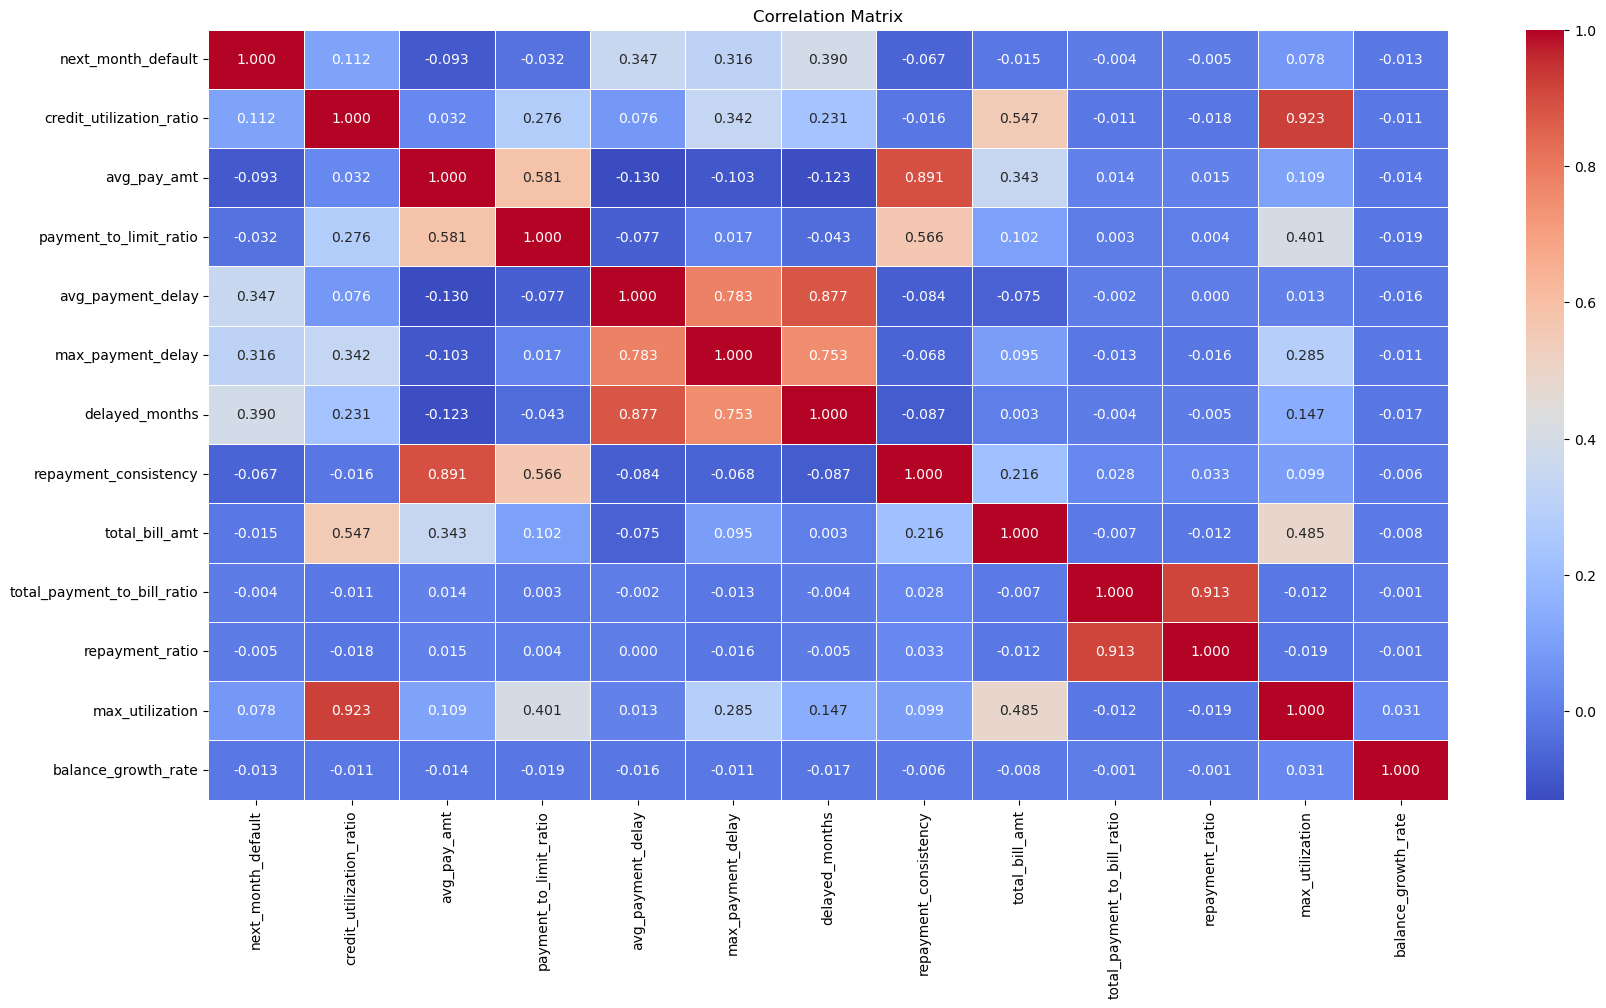

In [19]:
corr_2 = ['next_month_default'] +list(new_features)
corr_matrix_nf = df[corr_2].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_nf, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [20]:
corr_3 = df[corr_2].corr()
target_corr = corr_3['next_month_default'].sort_values(ascending=False)
print(target_corr)

next_month_default             1.000000
delayed_months                 0.389616
avg_payment_delay              0.347309
max_payment_delay              0.315777
credit_utilization_ratio       0.111658
max_utilization                0.077694
total_payment_to_bill_ratio   -0.003602
repayment_ratio               -0.004950
balance_growth_rate           -0.013490
total_bill_amt                -0.014674
payment_to_limit_ratio        -0.031848
repayment_consistency         -0.067327
avg_pay_amt                   -0.092854
Name: next_month_default, dtype: float64


In [21]:
df.describe()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio_clip,avg_delay,credit_utilization_ratio,avg_pay_amt,payment_to_limit_ratio,avg_payment_delay,max_payment_delay,delayed_months,repayment_consistency,total_bill_amt,total_payment_to_bill_ratio,repayment_ratio,max_utilization,balance_growth_rate
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,2.524700e+04
mean,1.558205,0.604111,1.840813,168342.060443,35.431022,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.331267,-0.204070,0.370435,5349.685697,0.235143,0.351996,0.401671,0.785915,5900.030185,2.693817e+05,57.126108,18.205099,0.492665,6.151485e+03
std,0.521965,0.489050,0.749217,129892.784807,9.152635,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,0.415886,0.962469,0.349451,10414.492020,0.321131,0.664764,1.321125,1.507302,15384.027068,3.768456e+05,5504.956211,1102.070157,0.432011,1.097118e+05
min,1.000000,0.000000,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-0.785000,-2.000000,-0.200154,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000e+00
25%,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,-0.833333,0.029802,1125.200833,0.068289,0.000000,0.000000,0.000000,621.938712,2.938455e+04,0.042973,0.042544,0.070915,-1.512482e-01
50%,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000,0.280751,2433.158333,0.156748,0.000000,0.000000,0.000000,1429.637898,1.266769e+05,0.104060,0.097190,0.426282,2.696391e-03
75%,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000,0.682001,5641.549167,0.264483,0.500000,2.000000,1.000000,4176.290078,3.428564e+05,0.627927,0.516041,0.920626,9.258983e-01
max,3.000000,1.000000,4.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,1.415000,5.500000,3.759125,627344.321667,14.566342,6.000000,8.000000,6.000000,650098.453710,5.263884e+06,852634.315789,142105.719298,10.688579,1.069743e+07


In [22]:
print(df.isna().sum())

marriage                       0
sex                            0
education                      0
LIMIT_BAL                      0
age                            0
pay_0                          0
pay_2                          0
pay_3                          0
pay_4                          0
pay_5                          0
pay_6                          0
Bill_amt1                      0
Bill_amt2                      0
Bill_amt3                      0
Bill_amt4                      0
Bill_amt5                      0
Bill_amt6                      0
pay_amt1                       0
pay_amt2                       0
pay_amt3                       0
pay_amt4                       0
pay_amt5                       0
pay_amt6                       0
AVG_Bill_amt                   0
next_month_default             0
PAY_TO_BILL_ratio_clip         0
avg_delay                      0
credit_utilization_ratio       0
avg_pay_amt                    0
payment_to_limit_ratio         0
avg_paymen

# 3. Pre-Processing & Model Training

In [23]:
y = df['next_month_default']
X = df.drop(columns=['next_month_default'])

#Categorical features
cat_cols = ['delayed_months', 'max_payment_delay', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
            'pay_5', 'pay_6', 'education', 'sex', 'marriage']
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Class Weights (for use in models like LogisticRegression)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

# Apply SMOTENC(As we have categorical and continous features both)
smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)
print("After SMOTENC, class distribution:")
print(y_train_smote.value_counts())

Class Weights: {'0': 0.6175697162426614, '1': 2.6263979193758127}
After SMOTE, class distribution:
next_month_default
0    16352
1    16352
Name: count, dtype: int64
After SMOTENC, class distribution:
next_month_default
0    16352
1    16352
Name: count, dtype: int64


## 3(a) SMOTENC for training

In [24]:
X_train_final, y_train_final = X_train_smotenc, y_train_smotenc

# Convert y to numeric if encoded as strings
y_train_final = y_train_final.astype(int)
y_val = y_val.astype(int)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)

# Calculate scale_pos_weight for XGBoost and LGBM
pos_count = np.sum(y_train_final == 1)
neg_count = np.sum(y_train_final == 0)
scale_pos_weight = neg_count / pos_count if pos_count != 0 else 1

In [25]:
# Model 1: Logistic Regression with class weights and scaled features
lr = LogisticRegression(class_weight='balanced', max_iter=2000)
lr.fit(X_train_scaled, y_train_final)
y_pred_lr = lr.predict(X_val_scaled)
y_proba_lr = lr.predict_proba(X_val_scaled)[:, 1]

In [26]:
# Model 2: Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train_final)
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

In [27]:
# Model 3: XGBoost
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,
                     eval_metric='logloss', random_state=42)

# ensure y_train_final is numpy array of integers
xgb.fit(X_train_final, y_train_final)
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

In [28]:
# Model 4: LightGBM
lgbm = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lgbm.fit(X_train_final, y_train_final)
y_pred_lgbm = lgbm.predict(X_val)
y_proba_lgbm = lgbm.predict_proba(X_val)[:, 1]

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6969
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4088
           1       0.42      0.60      0.50       962

    accuracy                           0.77      5050
   macro avg       0.66      0.70      0.67      5050
weighted avg       0.81      0.77      0.78      5050

F2 Score: 0.5547
Confusion Matrix:
[[3288  800]
 [ 382  580]]
ROC AUC: 0.7570

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4088
           1       0.53      0.44      0.48       962

    accuracy                           0.82      5050
   macro avg       0.70      0.68      0.69      5050
weighted avg       0.81      0.82      0.81      5050

F2 Score: 0.4594
Confusion Matrix:
[[3706  382]
 [ 534  428]]
ROC AUC: 0.7714

Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4088
           1   

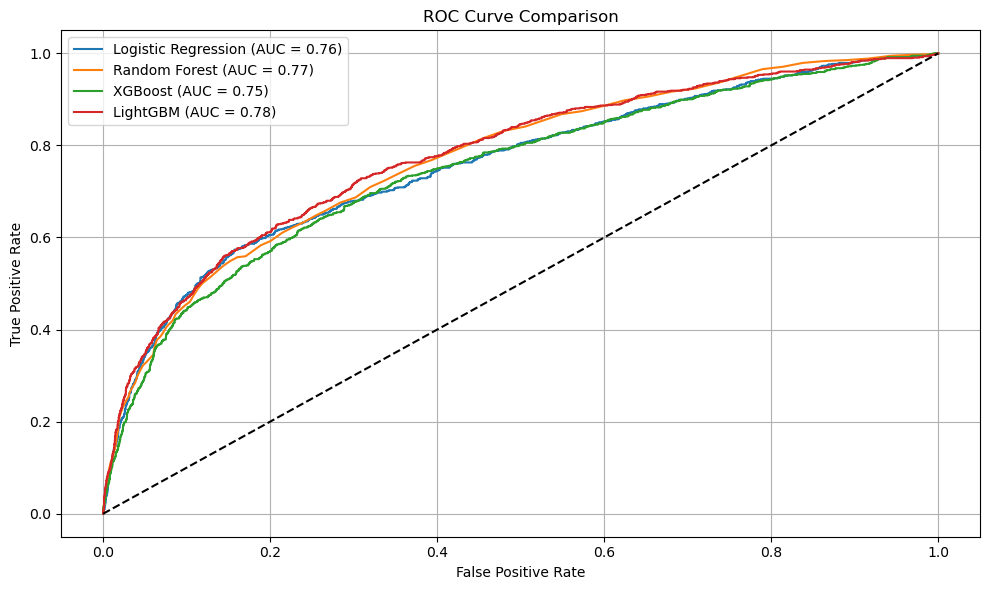

In [29]:
# Function to evaluate models
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    print(f"F2 Score: {fbeta_score(y_true, y_pred, beta=2):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.4f}")

    fpr, tpr, _ = roc_curve(y_true.astype(int), y_proba, pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_true, y_proba):.2f})")

# Evaluate all models
plt.figure(figsize=(10, 6))
evaluate_model("Logistic Regression", y_val, y_pred_lr, y_proba_lr)
evaluate_model("Random Forest", y_val, y_pred_rf, y_proba_rf)
evaluate_model("XGBoost", y_val, y_pred_xgb, y_proba_xgb)
evaluate_model("LightGBM", y_val, y_pred_lgbm, y_proba_lgbm)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

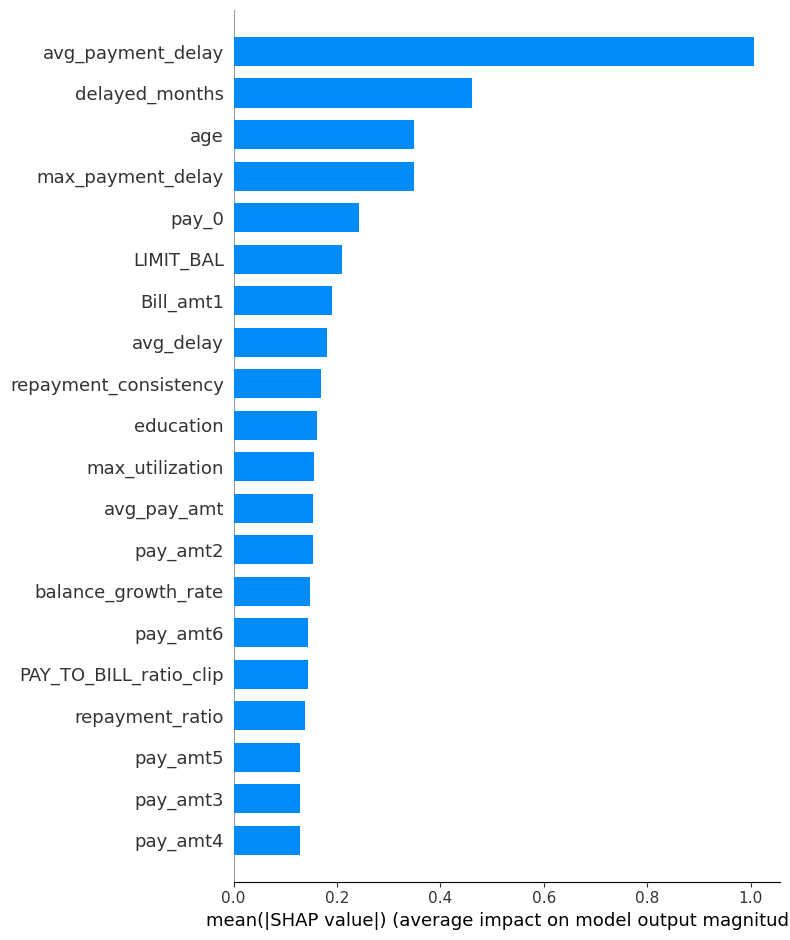

In [30]:
#SHAP for feature explanation
explainer = shap.Explainer(xgb)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val, plot_type="bar")

### Random Forest Threshold Tuning
Getting the best `threshold` to maxmize `F2 Score`

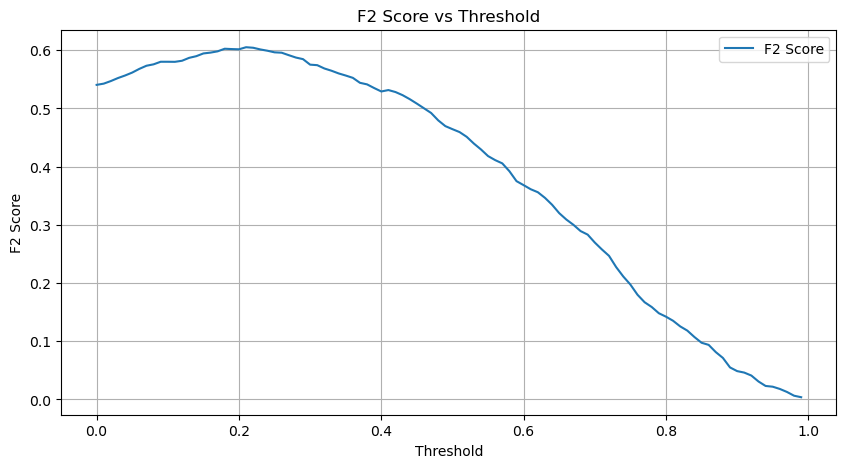

Best threshold for maximum F2: 0.210, F2 Score: 0.6052


In [31]:
# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_rf)

# F2 score for each threshold by formula
f2_scores = [(5 * p * r) / (4 * p + r + 1e-10) for p, r in zip(precision, recall)]

# Plot F2 score vs threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f2_scores[:-1], label='F2 Score')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

# Best threshold
best_thresh = thresholds[np.argmax(f2_scores)]
print(f"Best threshold for maximum F2: {best_thresh:.3f}, F2 Score: {max(f2_scores):.4f}")

#### Accuracy Reports corresponding the best Threshold

In [32]:
print("Random Forest tuned to give maximum F2 score: \n")
print(f"  Best threshold for maximum F2: {best_thresh:.3f}, F2 Score: {max(f2_scores):.4f} \n")

print("   Classification report for random forest tuned")
y_pred_best = (y_proba_rf >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_best))
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred_best))

Random Forest tuned to give maximum F2 score: 

  Best threshold for maximum F2: 0.210, F2 Score: 0.6052 

   Classification report for random forest tuned
              precision    recall  f1-score   support

           0       0.93      0.52      0.67      4088
           1       0.29      0.83      0.43       962

    accuracy                           0.58      5050
   macro avg       0.61      0.68      0.55      5050
weighted avg       0.81      0.58      0.62      5050

Confusion Matrix
[[2127 1961]
 [ 162  800]]


### Hyperparams Tuning for LGBM Classifier

In [36]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, fbeta_score

# Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

smotenc_1 = SMOTENC(categorical_features=cat_indices, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('smote', smotenc_1),
    ('lgbm', LGBMClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'lgbm__n_estimators': [100, 200],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__class_weight': [None, 'balanced']
}

# Use stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F2 Score on CV:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\heman\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6969
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [40]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)

print("\n LGBM Classification Report corresponding to best tuned Hyperparameters:")
y_val_pred = grid_search.predict(X_val)
y_val_proba = grid_search.predict_proba(X_val)[:, 1]

y_val = y_val.astype(int)
y_val_pred = y_val_pred.astype(int)
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("F2 Score on Validation:", fbeta_score(y_val, y_val_pred, beta=2))

Best Parameters: {'lgbm__class_weight': None, 'lgbm__learning_rate': 0.01, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 100}

 LGBM Classification Report corresponding to best tuned Hyperparameters:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4088
           1       0.40      0.64      0.49       962

    accuracy                           0.75      5050
   macro avg       0.65      0.71      0.66      5050
weighted avg       0.81      0.75      0.77      5050

Confusion Matrix:
[[3166  922]
 [ 346  616]]
F2 Score on Validation: 0.5718529520980319


# 4. RESULTS 
### We'll use the LGBM classifier with tuned hyperparameter.
It gave the best balance between Recall for class-1 (Default), F2 Score and the overall accuracy of the model.  
  Recall (Class-1): 0.64   
  F2 Score : 0.5718  
  Accuracy: 0.75  

# 5. Final Predictions

In [50]:
validation_data = "Datasets_final/validate_dataset_final.csv"
df_v = pd.read_csv(validation_data)
customer = df_v['Customer_ID']
df_v['PAY_TO_BILL_ratio_clip'] = df_v['PAY_TO_BILL_ratio'].clip(lower=lower_bound, upper=upper_bound)
df_v.drop(['Customer_ID', 'PAY_TO_BILL_ratio'],axis=1, inplace = True)
df_v['avg_delay'] = df_v[pay_cols].mean(axis=1)

In [51]:
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

df_v['credit_utilization_ratio'] = df_v['AVG_Bill_amt'] / df_v['LIMIT_BAL']
df_v['avg_pay_amt'] = df_v[pay_amt_cols].mean(axis=1)
df_v['payment_to_limit_ratio'] = df_v[pay_amt_cols].sum(axis=1) / df_v['LIMIT_BAL']
df_v['avg_payment_delay'] = df_v[pay_status_cols].apply(lambda row: row[row >= 0].mean(), axis=1).fillna(0)
df_v['max_payment_delay'] = df_v[pay_status_cols].max(axis=1)
df_v['delayed_months'] = df_v[pay_status_cols].apply(lambda row: (row >= 1).sum(), axis=1)
df_v['repayment_consistency'] = df_v[pay_amt_cols].std(axis=1)
df_v['total_bill_amt'] = df_v[bill_cols].sum(axis=1)
df_v['total_payment_to_bill_ratio'] = df_v[pay_amt_cols].sum(axis=1) / df_v[bill_cols].sum(axis=1).replace(0, np.nan)
df_v['repayment_ratio'] = df_v[pay_amt_cols].mean(axis=1) / df_v[bill_cols].replace(0, np.nan).mean(axis=1)
df_v['max_utilization'] = df_v[bill_cols].max(axis=1) / df_v['LIMIT_BAL']
df_v['balance_growth_rate'] = (df_v['Bill_amt1'] - df_v['Bill_amt6']) / df_v['Bill_amt6'].replace(0, np.nan)

#As we have used divide operator so it might have generated NaN or infinite values so to fix that 
numeric_cols = df_v.select_dtypes(include=[np.number]).columns
df_v[numeric_cols] = df_v[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

In [52]:
df_v.describe()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio_clip,avg_delay,credit_utilization_ratio,avg_pay_amt,payment_to_limit_ratio,avg_payment_delay,max_payment_delay,delayed_months,repayment_consistency,total_bill_amt,total_payment_to_bill_ratio,repayment_ratio,max_utilization,balance_growth_rate
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5.016000e+03
mean,1.554027,0.606659,1.840909,168977.272727,35.379785,-0.031300,-0.161683,-0.188198,-0.235048,-0.264952,-0.311603,52709.849268,50312.195385,4.827320e+04,44179.082263,41244.782709,39805.868369,5356.196780,6.321958e+03,5420.142849,5150.979306,4926.404159,5148.384402,46054.169703,0.327054,-0.198797,0.372736,5387.344262,0.235476,0.355203,0.414872,0.799442,5903.217373,2.765250e+05,6.207392,2.450375,0.492456,5.171311e+03
std,0.517560,0.488540,0.794177,129478.787500,9.206542,1.116011,1.178731,1.172155,1.129667,1.110709,1.107030,76840.129611,73484.070115,7.391142e+04,65681.054142,62255.394325,60698.632561,13660.489329,2.920905e+04,17011.204561,17376.949234,17085.022267,16879.411346,65214.851897,0.412206,0.958368,0.348080,10838.699289,0.306301,0.654209,1.318754,1.506003,16309.456527,3.912592e+05,178.692190,60.942454,0.421182,6.215434e+04
min,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-10897.000000,-0.785000,-2.000000,-0.100000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000e+00
25%,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3303.880000,2781.407500,2.684255e+03,2317.695000,1755.395000,1205.210000,1000.047500,9.899050e+02,403.265000,278.172500,299.310000,156.382500,4905.665000,0.040000,-0.833333,0.030047,1103.067917,0.067611,0.000000,0.000000,0.000000,611.043895,2.952766e+04,0.043467,0.042897,0.069961,-1.566759e-01
50%,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22445.680000,20966.445000,1.986985e+04,18912.755000,17953.255000,17054.315000,2093.655000,2.000410e+03,1845.425000,1500.120000,1500.155000,1453.210000,20933.415000,0.090000,0.000000,0.284760,2399.653333,0.155289,0.000000,0.000000,0.000000,1430.284740,1.255980e+05,0.106452,0.101215,0.439636,2.107344e-03
75%,2.000000,1.000000,2.000000,240000.000000,41.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67620.940000,63882.415000,6.074175e+04,54818.657500,50175.052500,49070.565000,5029.505000,5.000323e+03,4883.887500,4282.550000,4097.725000,4000.095000,56573.540000,0.570000,0.000000,0.686106,5692.041667,0.261724,0.500000,2.000000,1.000000,4135.992296,3.394378e+05,0.611996,0.514664,0.920608,9.331819e-01
max,3.000000,1.000000,6.000000,800000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,746813.180000,624475.560000,1.664089e+06,565668.960000,547880.830000,513798.830000,323014.110000,1.684259e+06,371717.910000,432129.910000,426529.180000,260000.100000,548854.330000,1.415000,5.500000,2.117444,385691.953333,4.628303,5.500000,8.000000,6.000000,650098.453710,3.293128e+06,9525.904762,3086.456790,3.502760,2.816616e+06


In [53]:
X_validation = df_v
predictions = grid_search.predict(X_validation)

In [54]:
prediction = pd.DataFrame({
    'Customer_ID': customer,
    'next_month_default': predictions
})

In [56]:
filename = 'submission_23113066.csv'
prediction.to_csv(filename, index=False)

In [57]:
prediction['next_month_default'].value_counts()

next_month_default
0    3466
1    1550
Name: count, dtype: int64